In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split #splits data into train and test
from sklearn.linear_model import LinearRegression

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('/kaggle/input/video-games/games.csv')

In [3]:
df.shape

(20580, 8)

In [4]:
df.sample(10)

,id,name,released,added,playtime,reviews_count,ratings_count,rating
11326,17982,Adventurezator: When Pigs Fly,2015-09-17,138,3,2,2,0.00
18601,62518,SG/ZH: School Girl/Zombie Hunter,2018-06-05,57,3,3,3,0.00
8503,746,Destroy All Humans! 2,2006-10-17,223,0,46,45,3.67
19592,573923,Friday Night Funkin' (with my 2 favorites mods),2021-03-17,50,0,24,23,4.04
3101,2266,Full Mojo Rampage,2013-08-16,960,2,43,43,2.42
7115,18528,Epic Battle Fantasy 3,2016-09-01,297,1,17,17,3.59
6029,300689,Tails of Iron,2021-09-17,388,5,65,65,4.03
4748,44064,Loading Screen Simulator,2017-07-13,562,1,66,65,2.38
3692,47525,Disneyland Adventures,2017-10-31,779,1,97,97,2.47
15573,1900,Spectromancer,2009-02-11,83,2,8,8,3.62


In [5]:
df.describe()

,id,added,playtime,reviews_count,ratings_count,rating
count,20580.000000,20580.000000,20580.000000,20580.000000,20580.000000,20580.000000
mean,99829.712974,681.082313,3.394704,106.611370,105.464431,2.209226
std,181760.561898,1509.210518,11.109085,338.262309,334.656611,1.673076
min,1.000000,45.000000,0.000000,0.000000,0.000000,0.000000
25%,13411.750000,84.000000,1.000000,4.000000,4.000000,0.000000
50%,21393.500000,161.000000,2.000000,13.000000,13.000000,2.820000
75%,54124.000000,496.000000,4.000000,49.000000,48.000000,3.670000
max,960912.000000,19385.000000,900.000000,6421.000000,6332.000000,4.800000


In [6]:
df['released'] = pd.to_datetime(df['released'])
df['release_year'] = df['released'].dt.year
df['release_day_of_week'] = df['released'].dt.day_name()
df['release_month'] = df['released'].dt.month_name()
df.head(10)

,id,name,released,added,playtime,reviews_count,ratings_count,rating,release_year,release_day_of_week,release_month
0,3498,Grand Theft Auto V,2013-09-17,19385,73,6421,6332,4.47,2013.0,Tuesday,September
1,3328,The Witcher 3: Wild Hunt,2015-05-18,18567,46,6122,6029,4.66,2015.0,Monday,May
2,4200,Portal 2,2011-04-18,17494,11,5310,5263,4.62,2011.0,Monday,April
3,5286,Tomb Raider (2013),2013-03-05,15290,10,3686,3660,4.05,2013.0,Tuesday,March
4,4291,Counter-Strike: Global Offensive,2012-08-21,15174,65,3267,3236,3.57,2012.0,Tuesday,August
5,13536,Portal,2007-10-09,14864,4,4428,4392,4.51,2007.0,Tuesday,October
6,12020,Left 4 Dead 2,2009-11-17,14818,9,3078,3060,4.09,2009.0,Tuesday,November
7,5679,The Elder Scrolls V: Skyrim,2011-11-11,14654,46,4375,4332,4.42,2011.0,Friday,November
8,4062,BioShock Infinite,2013-03-26,14150,12,3829,3792,4.39,2013.0,Tuesday,March
9,28,Red Dead Redemption 2,2018-10-26,14059,19,4616,4524,4.59,2018.0,Friday,October


In [7]:
df=df.drop(['name'],axis=1)

In [8]:
df=df.drop(['id'],axis=1)

In [9]:
df=df.drop(['released'],axis=1)

<AxesSubplot: xlabel='playtime', ylabel='rating'>

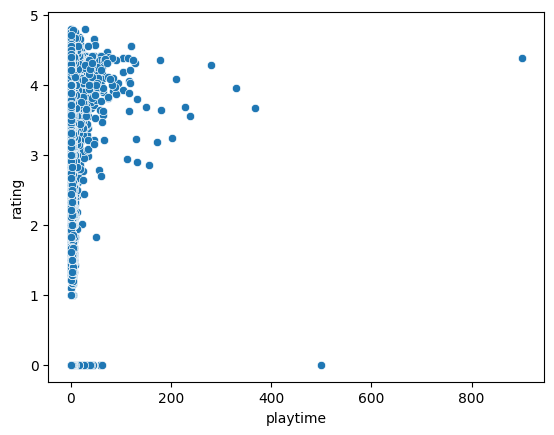

In [10]:
sns.scatterplot(x='playtime',y='rating',data=df)

<AxesSubplot: xlabel='added', ylabel='rating'>

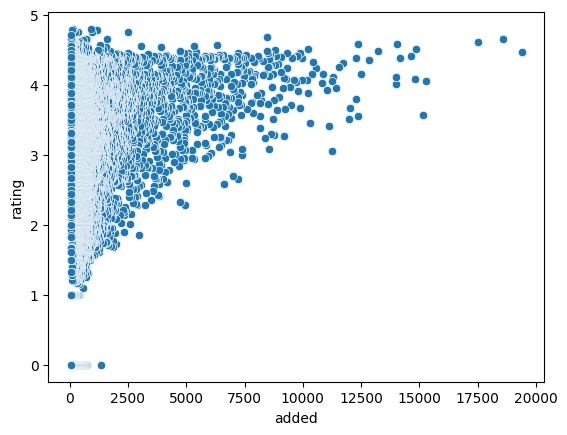

In [11]:
sns.scatterplot(x='added',y='rating',data=df)

In [12]:
df=pd.get_dummies(df,columns=['release_day_of_week'])

In [13]:
df=pd.get_dummies(df,columns=['release_month'])

In [14]:
df.sample(10)

,added,playtime,reviews_count,ratings_count,rating,release_year,release_day_of_week_Friday,release_day_of_week_Monday,release_day_of_week_Saturday,release_day_of_week_Sunday,...,release_month_December,release_month_February,release_month_January,release_month_July,release_month_June,release_month_March,release_month_May,release_month_November,release_month_October,release_month_September
15540,83,1,3,3,0.00,2016.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15628,82,2,1,1,0.00,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17725,64,1,2,2,0.00,2018.0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
693,7533,10,1743,1717,4.32,2017.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
17565,66,1,2,2,0.00,2013.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7970,248,1,11,11,3.36,2019.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
19167,53,1,1,1,0.00,2019.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
15786,81,1,8,8,2.88,1994.0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
14779,89,1,0,0,0.00,2021.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5961,395,1,52,52,3.77,2021.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


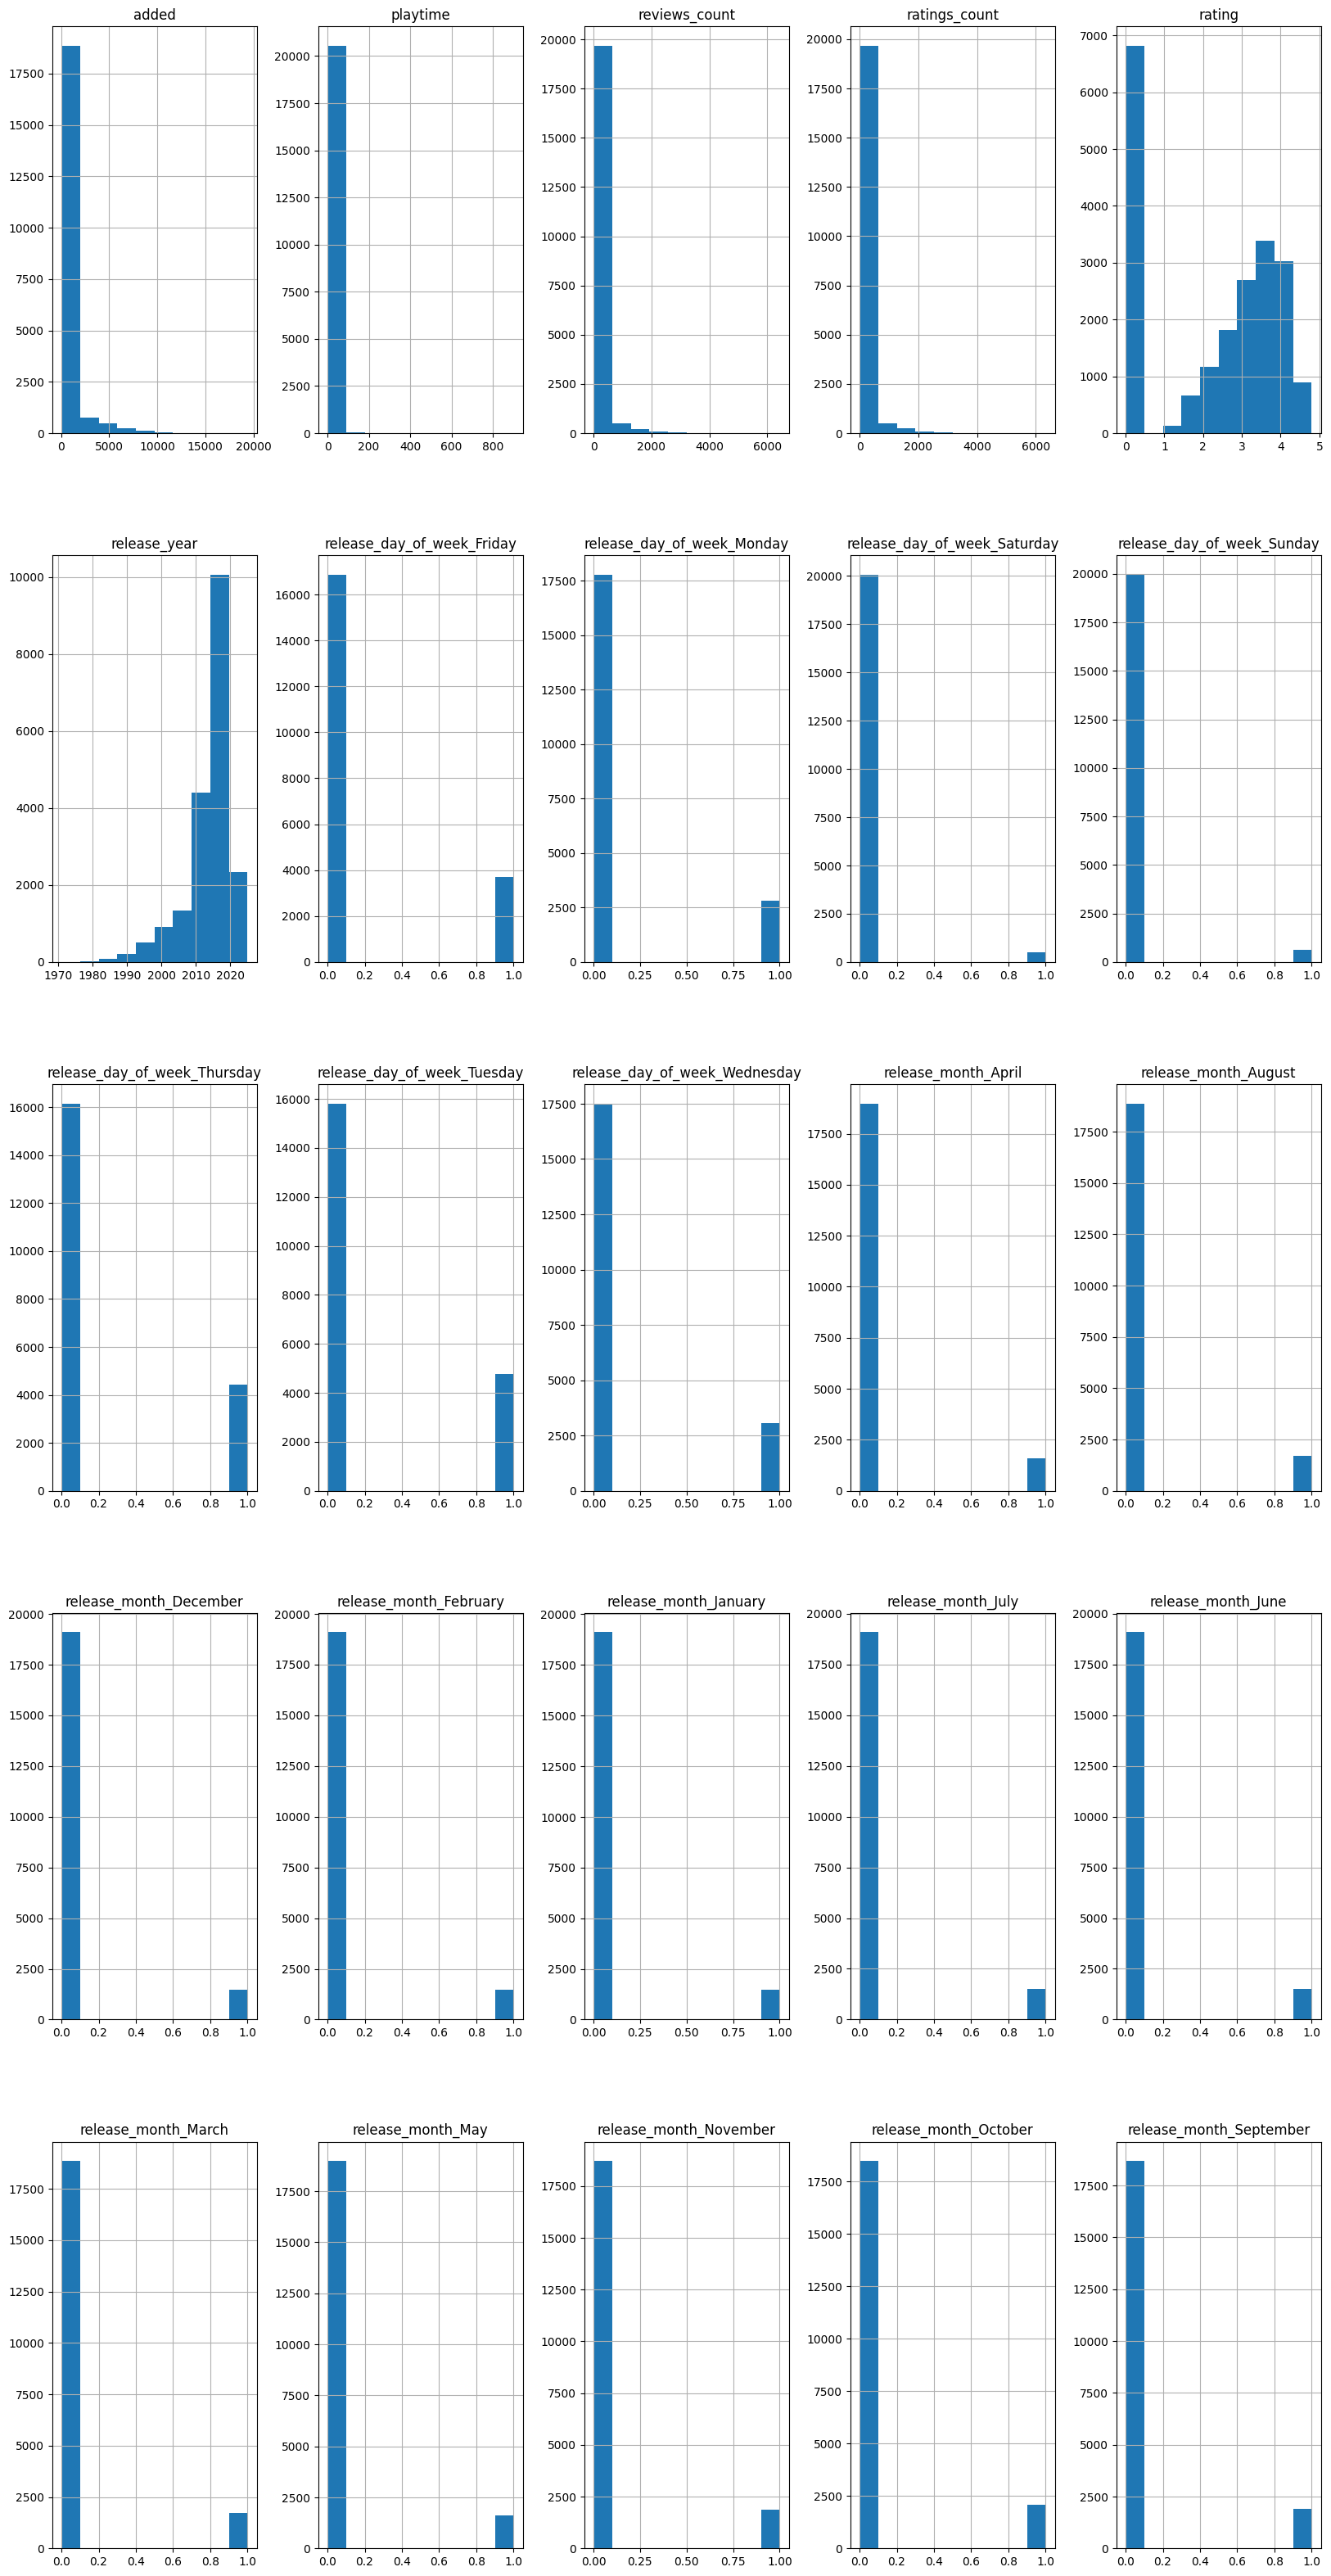

In [15]:
df.hist(figsize=(20,40))
plt.show()

## linear regression without removing outliers

In [16]:
df.isnull().sum()

added                              0
playtime                           0
reviews_count                      0
ratings_count                      0
rating                             0
release_year                     686
release_day_of_week_Friday         0
release_day_of_week_Monday         0
release_day_of_week_Saturday       0
release_day_of_week_Sunday         0
release_day_of_week_Thursday       0
release_day_of_week_Tuesday        0
release_day_of_week_Wednesday      0
release_month_April                0
release_month_August               0
release_month_December             0
release_month_February             0
release_month_January              0
release_month_July                 0
release_month_June                 0
release_month_March                0
release_month_May                  0
release_month_November             0
release_month_October              0
release_month_September            0
dtype: int64

In [17]:
for i in range(0, 20580):
    if pd.isna(df.loc[i, 'release_year']):
        df = df.drop(i)

In [18]:
df.isnull().sum()

added                            0
playtime                         0
reviews_count                    0
ratings_count                    0
rating                           0
release_year                     0
release_day_of_week_Friday       0
release_day_of_week_Monday       0
release_day_of_week_Saturday     0
release_day_of_week_Sunday       0
release_day_of_week_Thursday     0
release_day_of_week_Tuesday      0
release_day_of_week_Wednesday    0
release_month_April              0
release_month_August             0
release_month_December           0
release_month_February           0
release_month_January            0
release_month_July               0
release_month_June               0
release_month_March              0
release_month_May                0
release_month_November           0
release_month_October            0
release_month_September          0
dtype: int64

In [19]:
df.dtypes

added                              int64
playtime                           int64
reviews_count                      int64
ratings_count                      int64
rating                           float64
release_year                     float64
release_day_of_week_Friday         uint8
release_day_of_week_Monday         uint8
release_day_of_week_Saturday       uint8
release_day_of_week_Sunday         uint8
release_day_of_week_Thursday       uint8
release_day_of_week_Tuesday        uint8
release_day_of_week_Wednesday      uint8
release_month_April                uint8
release_month_August               uint8
release_month_December             uint8
release_month_February             uint8
release_month_January              uint8
release_month_July                 uint8
release_month_June                 uint8
release_month_March                uint8
release_month_May                  uint8
release_month_November             uint8
release_month_October              uint8
release_month_Se

In [20]:
y=df['rating']
x=df.drop('rating',axis=1)

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [22]:
model_1=LinearRegression()
model_1.fit(x_train,y_train)

LinearRegression()

In [23]:
model_1.score(x_train,y_train)

0.21348110288967925

### model after removing outliers

In [24]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    return lower_range,upper_range

In [25]:
low_playtime,high_playtime=remove_outlier(df["playtime"])
df["playtime"]=np.where(df["playtime"]>high_playtime,high_playtime,df["playtime"])
df["playtime"]=np.where(df['playtime']<low_playtime,low_playtime,df["playtime"])

In [26]:
low_reviews_count,high_reviews_count=remove_outlier(df["reviews_count"])
df["reviews_count"]=np.where(df["reviews_count"]>high_reviews_count,high_reviews_count,df["reviews_count"])
df["reviews_count"]=np.where(df['reviews_count']<low_reviews_count,low_reviews_count,df["reviews_count"])

In [27]:
low_added,high_added=remove_outlier(df["added"])
df["added"]=np.where(df["added"]>high_added,high_added,df["added"])
df["added"]=np.where(df['added']<low_added,low_added,df["added"])

In [28]:
low_ratings_count,high_ratings_count=remove_outlier(df["ratings_count"])
df["ratings_count"]=np.where(df["added"]>high_ratings_count,high_ratings_count,df["ratings_count"])
df["ratings_count"]=np.where(df['added']<low_ratings_count,low_ratings_count,df["ratings_count"])

In [29]:
df.describe()

,added,playtime,reviews_count,ratings_count,rating,release_year,release_day_of_week_Friday,release_day_of_week_Monday,release_day_of_week_Saturday,release_day_of_week_Sunday,...,release_month_December,release_month_February,release_month_January,release_month_July,release_month_June,release_month_March,release_month_May,release_month_November,release_month_October,release_month_September
count,19894.000000,19894.000000,19894.000000,19894.000000,19894.000000,19894.000000,19894.000000,19894.000000,19894.000000,19894.000000,...,19894.000000,19894.000000,19894.000000,19894.000000,19894.000000,19894.000000,19894.000000,19894.000000,19894.000000,19894.000000
mean,365.574972,2.556701,35.289610,76.074646,2.254199,2013.702222,0.186539,0.140997,0.025586,0.031215,...,0.074445,0.074495,0.073691,0.075148,0.075199,0.087011,0.080275,0.093797,0.105107,0.095355
std,390.140576,2.220604,42.863788,56.131967,1.660833,6.617764,0.389551,0.348027,0.157899,0.173904,...,0.262500,0.262581,0.261273,0.263637,0.263718,0.281858,0.271726,0.291554,0.306699,0.293713
min,45.000000,0.000000,0.000000,0.000000,0.000000,1971.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,85.000000,1.000000,4.000000,5.000000,0.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,166.000000,2.000000,14.000000,121.500000,2.860000,2016.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,520.000000,4.000000,51.000000,121.500000,3.690000,2017.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1172.500000,8.500000,121.500000,121.500000,4.800000,2025.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
df.isnull().sum()

added                            0
playtime                         0
reviews_count                    0
ratings_count                    0
rating                           0
release_year                     0
release_day_of_week_Friday       0
release_day_of_week_Monday       0
release_day_of_week_Saturday     0
release_day_of_week_Sunday       0
release_day_of_week_Thursday     0
release_day_of_week_Tuesday      0
release_day_of_week_Wednesday    0
release_month_April              0
release_month_August             0
release_month_December           0
release_month_February           0
release_month_January            0
release_month_July               0
release_month_June               0
release_month_March              0
release_month_May                0
release_month_November           0
release_month_October            0
release_month_September          0
dtype: int64

In [31]:
model_2=LinearRegression()
model_2.fit(x_train,y_train)

LinearRegression()

In [32]:
model_2.score(x_train,y_train)

0.21348110288967925

### decision tree regression

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
model_3=DecisionTreeRegressor(max_depth=8)

In [35]:
model_3.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=8)

In [36]:
model_3.score(x_train,y_train)

0.9314611066593474

In [37]:
model_3.score(x_test,y_test)

0.9253392913943993

### bagging regression

In [38]:
from sklearn.ensemble import BaggingRegressor

In [39]:
model_4=BaggingRegressor(n_estimators=8,base_estimator=model_3)

In [40]:
model_4.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=8),
                 n_estimators=8)

In [41]:
model_4.score(x_train,y_train)

0.9373304701463737

In [42]:
model_4.score(x_test,y_test)

0.9318291241686573

In [43]:
from sklearn.ensemble import AdaBoostRegressor

In [44]:
model_5=AdaBoostRegressor(n_estimators=200)

In [45]:
model_5.fit(x_train,y_train)

AdaBoostRegressor(n_estimators=200)

In [46]:
model_5.score(x_train,y_train)

0.9079940486612639

In [47]:
model_5.score(x_test,y_test)

0.9070135173581132

#### therefore the best model is bagging regression with score of 0.937077520636409 in train data and 0.9317676902376177 in test data
